In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

#Read data from data set
cancerData = pd.read_csv("wdbc.dataset", header=None)

#Drop the column 0 which is ID - it is not the feature to predict - so drop it! 
cancerData = cancerData.drop([0], axis=1)

#Storing results into Y 
Y = cancerData.iloc[:,0]
#Mapping B, M to 0 and 1 respectively
Y = np.where(Y== 'M',1,0)

#Storing inputs into X
X = cancerData.iloc[:, 1:]

#Normalise the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Splitting the data into train(80%), validation(10%) and test(10%)  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5)

X_train_n = X_train

def predict(x, theta, bias):
    return np.dot(x, theta) + bias

def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-z)))

#Calculation loss/cost
def loss_func(y,hyp):
    loss = (-((y * np.log(hyp)) + (np.subtract(1,y) * np.log(np.subtract(1, hyp))))).mean()
    return loss  

#calculating gradient to minise the loss using gradient descent
def gradient_calculate(x, y, hyp):
    return (np.dot(x.T, np.subtract(hyp, y)) / y.shape[0])

#this function trains and validates the data
def train_and_validate(learning_rate, epochs):
    theta = np.zeros(X_train_n.shape[1])
    bias = 0.0
    train_loss_list = np.zeros(epochs)
    val_loss_list = np.zeros(epochs)

    for epoch in range(epochs):
        z = predict(X_train_n, theta, bias)
        hyp = sigmoid(z)
        train_loss_list[epoch] = loss_func(y_train, hyp)
        
        #calculating gradient to minimise the loss
        gradient = gradient_calculate(X_train_n, y_train, hyp)

        #updating weights and bias to minimise the loss
        theta = theta - (learning_rate * gradient)
        bias = bias - learning_rate * (np.add(hyp, - y_train).mean())

        #validating and calculating the validation loss
        z_val = predict(X_validation, theta, bias)
        hyp_val = sigmoid(z_val)
        val_loss_list[epoch] = loss_func(y_validation, hyp_val)
    
    training_accuracy = 1 - train_loss_list
    validation_accuracy = 1 - val_loss_list
    return theta, bias, training_accuracy, validation_accuracy, train_loss_list, val_loss_list

#Perform the test for the calculated weight and bias from training
def test(theta, bias):
    z_test = predict(X_test, theta, bias)
    hyp_test = sigmoid(z_test)
    test_loss = loss_func(y_test, hyp_test)
    return hyp_test

#Calculate TP,TN, FP, FN
def evaluate(hyp_test):
    TP,TN, FP, FN = 0.0, 0.0, 0.0, 0.0
    for i in range(len(y_test)):
        hyp_test[i] = decision_boundary(hyp_test[i])

        if (y_test[i] == 1 and hyp_test[i] == 1):
            TP = TP + 1
        elif (y_test[i] == 0 and hyp_test[i] == 0):
            TN = TN + 1
        elif (y_test[i] == 0 and hyp_test[i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    return TP, TN, FP, FN

#defining the threshold above which it should be 1 and updating the values accordingly by calling this function
def decision_boundary(prob):
    return 1 if prob >= 0.5 else 0  

#Calculate accuracy
def calculate_accuracy(TP, TN, FP, FN):
    return ((TP+TN) / (TP + TN +FP + FN))

#Calculate precision
def calculate_precision(TP, FP):
    return (TP/ (TP + FP))

#Calculate recall
def calculate_recall(TP, FN):
    return (TP/float (TP + FN))

#Measuring accuracy, precision and recall of the model
def calculations(TP, TN, FP, FN):
    accuracy = calculate_accuracy(TP, TN, FP, FN)
    precision = calculate_precision(TP, FP)
    recall = calculate_recall(TP, FN)
    print("Accuracy: ",accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)

#to plot graph training loss vs validation loss and training accuracy vs validation accuracy
def plot_graph(train_loss_list, val_loss_list, validation_accuracy, training_accuracy):
    plt.plot(train_loss_list, label = 'Training_Loss')
    plt.plot(val_loss_list, label = 'Validation_Loss')
    plt.plot(validation_accuracy, label = 'Validation_Accuracy')
    plt.plot(training_accuracy, label = 'Training_Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epochs')
    plt.title("Loss/Accuracy VS Epochs")
    plt.legend()
    

TP:  15.0  TN:  38.0  FP:  0.0  FN:  4.0
Learning Rate:  0.03
Accuracy:  0.9298245614035088
Precision:  1.0
Recall:  0.7894736842105263


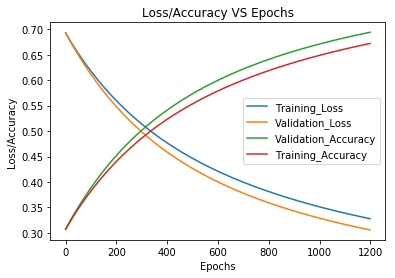

In [2]:
#train and validate the data :: trail1
lr = 0.03
epoch = 1200
theta, bias, train_accuracy, val_accuracy, train_loss, val_loss = train_and_validate(lr, epoch)

#Predict the values for the theta and bias finalized after training
hyp_test = test(theta, bias)
TP, TN, FP, FN = evaluate(hyp_test)

print("TP: ",TP, " TN: ",TN," FP: ",FP," FN: ", FN)
print("Learning Rate: ",lr)

calculations(TP, TN, FP, FN)
plot_graph(train_loss, val_loss, val_accuracy, train_accuracy)

TP:  13.0  TN:  38.0  FP:  0.0  FN:  6.0
Learning Rate:  0.01
Accuracy:  0.8947368421052632
Precision:  1.0
Recall:  0.6842105263157895


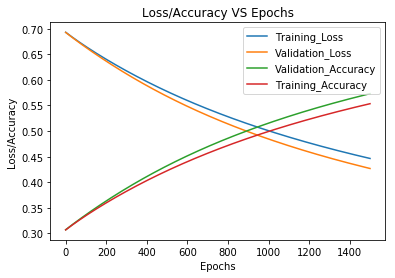

In [3]:
#train and validate the data :: trail2
lr = 0.01
epoch = 1500
theta, bias, train_accuracy, val_accuracy, train_loss, val_loss = train_and_validate(lr, epoch)

#Predict the values for the theta and bias finalized after training
hyp_test = test(theta, bias)
TP, TN, FP, FN = evaluate(hyp_test)

print("TP: ",TP, " TN: ",TN," FP: ",FP," FN: ", FN)
print("Learning Rate: ",lr)

calculations(TP, TN, FP, FN)
plot_graph(train_loss, val_loss, val_accuracy, train_accuracy)


TP:  17.0  TN:  38.0  FP:  0.0  FN:  2.0
Learning Rate:  0.1
Accuracy:  0.9649122807017544
Precision:  1.0
Recall:  0.8947368421052632


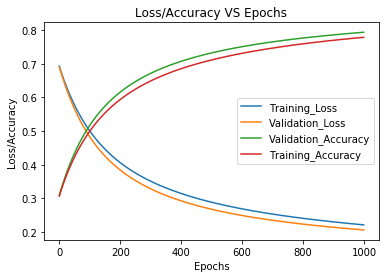

In [4]:
#train and validate the data :: trail3
lr = 0.1
epoch = 1000
theta, bias, train_accuracy, val_accuracy, train_loss, val_loss = train_and_validate(lr, epoch)

#Predict the values for the theta and bias finalized after training
hyp_test = test(theta, bias)
TP, TN, FP, FN = evaluate(hyp_test)

print("TP: ",TP, " TN: ",TN," FP: ",FP," FN: ", FN)

print("Learning Rate: ",lr)

calculations(TP, TN, FP, FN)
plot_graph(train_loss, val_loss, val_accuracy, train_accuracy)
